In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#we will make out own dataset
from sklearn.datasets import make_classification

X,y=make_classification(n_samples=1000, n_features=10 , n_redundant=5, n_informative=5, n_classes=2, random_state=1)

In [3]:
X

array([[ 2.56999479, -0.13019997,  3.16075093, ..., -1.93094078,
         3.26130366,  2.05692145],
       [ 0.34129317,  2.51321418, -0.80416572, ...,  6.24734437,
        -1.92769365,  2.9503149 ],
       [ 2.27539972,  3.36561455,  0.17164362, ...,  2.74693781,
         0.13492444,  2.00339547],
       ...,
       [ 0.5234359 ,  1.90466429,  0.93243365, ...,  1.53945231,
         1.90646166,  1.99458587],
       [ 1.33747921,  3.25859684,  0.78792366, ...,  5.18788314,
        -0.82071083,  3.51411431],
       [-0.98534299,  0.83919047,  2.5820803 , ...,  3.04705685,
         0.66885641,  3.32838496]], shape=(1000, 10))

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [5]:
X_train.shape

(700, 10)

In [6]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
ypred=model.predict(X_test)

In [9]:
#Evaluation matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test,ypred)

array([[129,  13],
       [ 34, 124]])

In [10]:
accuracy_score(y_test,ypred)

0.8433333333333334

In [12]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       142
           1       0.91      0.78      0.84       158

    accuracy                           0.84       300
   macro avg       0.85      0.85      0.84       300
weighted avg       0.85      0.84      0.84       300



In [19]:
from sklearn.metrics import roc_curve, auc

ypred_proba=model.predict_proba(X_test)[:,1]#probability of class 1
ypred_proba

array([0.98074543, 0.1630346 , 0.28836826, 0.13404523, 0.55118737,
       0.093381  , 0.96196454, 0.30121948, 0.12350803, 0.95731226,
       0.08778761, 0.42049714, 0.72313926, 0.23255511, 0.58121438,
       0.66837244, 0.94905128, 0.85972623, 0.97062375, 0.07234521,
       0.44982165, 0.95676726, 0.81009427, 0.10033704, 0.90917135,
       0.55589431, 0.14145472, 0.4616435 , 0.50964656, 0.17344476,
       0.24931498, 0.76014755, 0.09988604, 0.64112515, 0.95883863,
       0.9780211 , 0.98800651, 0.0543648 , 0.03435789, 0.46141478,
       0.08374178, 0.35333259, 0.02083056, 0.41419338, 0.26807876,
       0.17827763, 0.10715494, 0.37105347, 0.28588311, 0.05294433,
       0.13359114, 0.04523728, 0.62836506, 0.97984677, 0.59864183,
       0.10748243, 0.07895498, 0.17213621, 0.9844883 , 0.96882693,
       0.99515672, 0.90155236, 0.87722561, 0.36500043, 0.94415526,
       0.19466362, 0.06183406, 0.09986673, 0.45158351, 0.72166411,
       0.25229704, 0.02143247, 0.89969779, 0.5412839 , 0.98427

In [20]:
fpr,tpr,thresholds = roc_curve(y_test,ypred_proba)

In [21]:
roc_auc=auc(fpr, tpr)

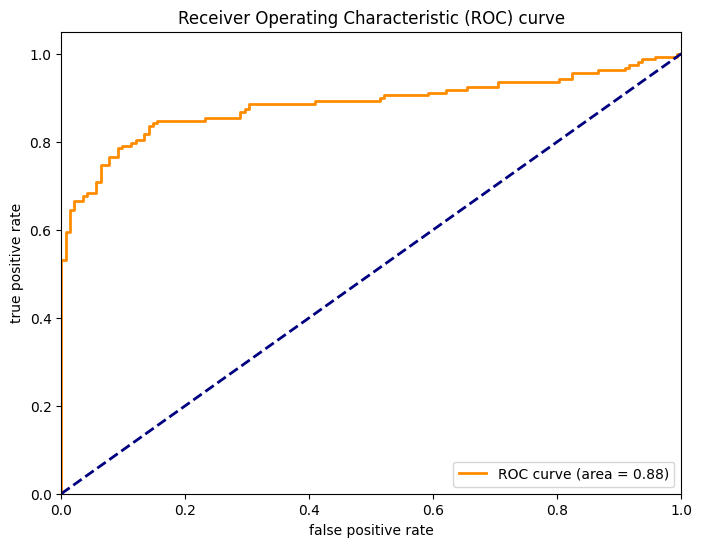

In [22]:
plt.figure(figsize=(8,6)) 
plt.plot(fpr,tpr, color='darkorange',linewidth=2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy', linewidth=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()